In [70]:
import pandas as pd
import time
from alpaca.trading.client import TradingClient
from alpaca.trading.requests import MarketOrderRequest
from alpaca.trading.enums import OrderSide, TimeInForce
from my_secrets import APCA_API_KEY_ID, APCA_API_SECRET_KEY

In [75]:
#Data set & columns
df = pd.read_csv('out.csv')
columns = ['Open', 'Close', 'Timestamp']
df.columns = columns
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

market_order_data_buy = MarketOrderRequest(symbol="BTCUSD", qty=0.1, side=OrderSide.BUY, time_in_force=TimeInForce.GTC)
market_order_data_sell = MarketOrderRequest(symbol="BTCUSD", qty=0.1, side=OrderSide.SELL, time_in_force=TimeInForce.GTC)
trading_client = TradingClient(APCA_API_KEY_ID, APCA_API_SECRET_KEY, paper=True)


STOCHASTIC OSCILLATOR

MACD

In [76]:
#Calculates divergence of stock price momentum 
exp1 = df['Close'].ewm(span=12).mean()
exp2 = df['Close'].ewm(span=26).mean() 
macd = exp1 - exp2
signal = macd.ewm(span=9).mean()


def generate_signals(df):
    signals = []
    buy = trading_client.submit_order(order_data = market_order_data_buy)
    sell = trading_client.submit_order(order_data = market_order_data_sell)
    for i in range(1, len(df)):
        if macd.iloc[i] > signal.iloc[i] and macd.iloc[i-1] <= signal.iloc[i-1]:
            buy
            print('Sell')
            #signals.append('Buy')   # Buy
        elif macd.iloc[i] < signal.iloc[i] and macd.iloc[i-1] >= signal.iloc[i-1]:
            sell
            print("Buy ")
            #signals.append('Sell')  # Sell
        else:
            None   # Hold

    return signals


while True:
    generate_signals(df)
    time.sleep(60)
    

Bought some BTC
Sold some BTC 
Bought some BTC
Sold some BTC 
Bought some BTC
Sold some BTC 
Bought some BTC
Bought some BTC
Sold some BTC 
Bought some BTC
Sold some BTC 
Bought some BTC
Sold some BTC 
Bought some BTC
Bought some BTC
Sold some BTC 
Bought some BTC
Sold some BTC 
Bought some BTC
Sold some BTC 
Bought some BTC
Bought some BTC
Sold some BTC 
Bought some BTC
Sold some BTC 
Bought some BTC
Sold some BTC 
Bought some BTC


KeyboardInterrupt: 

In [ ]:
#need to find a way to select values where MACD is separated from the
#the signal by a difference of +-3

msell = macd.loc[macd>signal]
mbuy = macd.loc[macd<signal]

def is_greater_equal_plusminus_3(value):
    return abs(value) >= 3

print(is_greater_equal_plusminus_3(mbuy))

2     False
9     False
10    False
11    False
12    False
13    False
14     True
15     True
16     True
17     True
18     True
19    False
20     True
21     True
22     True
23     True
24     True
25     True
26     True
27     True
28     True
29     True
30     True
31     True
32     True
33     True
76     True
77     True
78     True
79     True
80    False
81    False
82    False
83    False
84     True
85     True
86     True
87     True
88     True
89     True
90     True
91     True
92     True
Name: Close, dtype: bool


(<AxesSubplot: >, <AxesSubplot: >)

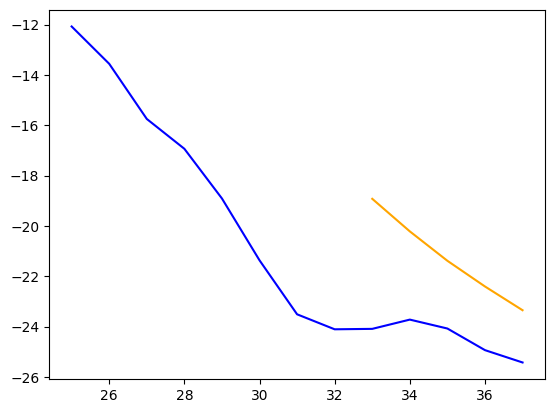

In [34]:
#Plotting Variables
#when MACD is greater than signal, the price goes up
macd.plot(color='blue'), signal.plot(color='orange')
#df['close'].plot(secondary_y=True)


In [ ]:
 #OSCILLATOR FORMULA

#14 day low average 
L14 = df['Low'].rolling(14).min()
H14 = df['High'].rolling(14).max()
    
#formula variables 
C = df['Close']
K = ((C - L14) * 100 / (H14 - L14))

Dvalue = K.rolling(3).mean()   

#BUY AND SELL SIGNAL
#finding values less than 20 and more than 80
osell = Dvalue.loc[Dvalue>80]
obuy = Dvalue.loc[Dvalue<20]


Bollinger Bands

In [35]:
#BB formula and variables
ma_30 = df['Close'].rolling(window=30).mean()
std_20 = df['Close'].rolling(window=20).std() 
upper = (ma_30 + 2*std_20)
lower = (ma_30 - 2*std_20)


In [12]:
#selecting dates and values where the price is greater than the upper
#and less than the lower
bsell = df['Close'].loc[df['Close']>upper]
bbuy = df['Close'].loc[df['Close']<lower]


<AxesSubplot: >

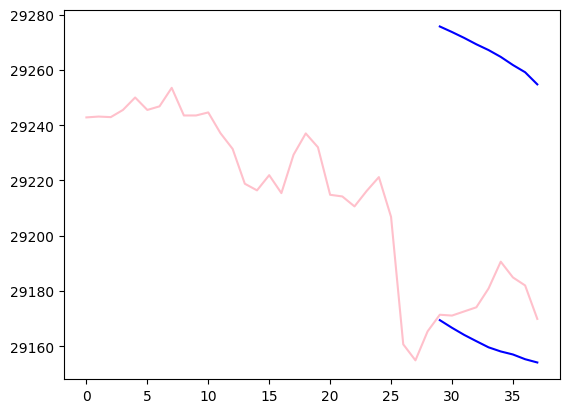

In [36]:
#Plotting buy and sell signals
bsell.plot(color='red', linestyle='dotted')
bbuy.plot(color='green', linestyle='dotted')
df['Close'].plot(color='pink')

#Graph
upper.plot(color='blue')
lower.plot(color='blue')
